In [1]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

In [2]:
## import table from HFHI
mortgagerelief = pd.read_csv('MRData.csv')
mortgagerelief.head(1)

,Affiliate,ID,Loan No,Street Address (ex: 1234 Five Lane),City,State Abbreviation,Zip,Sales Price,Closing Date (mm/yyyy),Term (Months),...,12-month report Financial counseling provided during period of mortgage relief,12-month report Other training/support received from HFH?,12-month report Description of other training received,12-month report Referrals to other agencies,12-month report Describe referral,12-month report Resident Loan number-referenced) currently residing in home?,"12-month report If resident no longer residing in home, please explain",12-month report-additional details on titleholders residing in home,Note,Funds
0,Aitkin County HFH (MN),1,78001567,NaN,Aitkin,MN,56431,"$ 88,800.00",9/27/2013,240.0,...,Yes,No,local banker/mentor,No,NaN,Yes,NaN,NaN,NaN,Thrivent


Text(0.5, 1.0, '# in household')

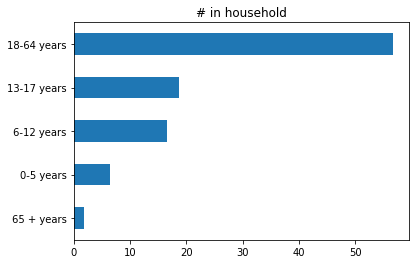

In [3]:
ages = mortgagerelief[["# in household 0-5 years", "# in household 6-12 years", "# in household 13-17 years",
                      "# in household  18-64 years", "# in household 65+ years"]]
ages = ages.fillna(0)
ages = ages.replace({"n/a": 0, "N/A": 0, "Unknown": 0, "Unkown": 0, "same as above file": 0,
                    "No App on File": 0})
ages = ages.rename(columns = {"# in household 0-5 years": "0-5 years", "# in household 6-12 years":"6-12 years", "# in household 13-17 years": "13-17 years",
                      "# in household  18-64 years": "18-64 years", "# in household 65+ years": "65 + years"})
ages = ages.astype(int)
ages = ages.sum(axis = 0)
ages = ages / sum(ages) * 100
ages = ages.sort_values()
ages.plot.barh()
plt.title("# in household")

### How many houses were foreclosed over time and why were they foreclosed?


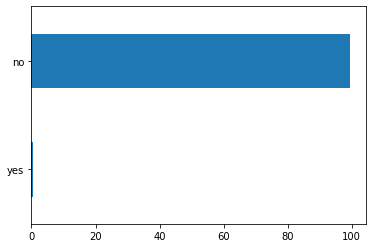

In [4]:
foreclosures = mortgagerelief["Has this property been foreclosed?"].str.lower().str.strip()
foreclosures = foreclosures.fillna("no") #na = didn't foreclose

foreclosures = foreclosures.value_counts().sort_values() #note: 1121 no, 5 yes
foreclosures = foreclosures / sum(foreclosures) * 100
foreclosures.plot.barh()


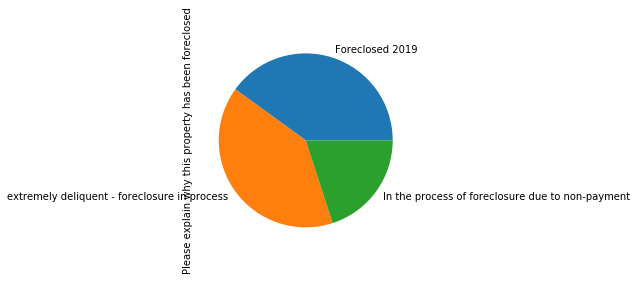

In [28]:
#reason
foreclosures = mortgagerelief["Has this property been foreclosed?"].str.lower().str.strip()
foreclosures = foreclosures.fillna("no") #na = didn't foreclose

foreclosureIndices = foreclosures[foreclosures=="yes"].index #get the indices of foreclosures
foreclosureReasons = mortgagerelief["Please explain why this property has been foreclosed"]
foreclosureReasons = foreclosureReasons.loc[[index for index in foreclosureIndices]] #isolate just the rows where foreclosed was "yes"
foreclosureReasons = foreclosureReasons.value_counts()
foreclosureReasons.plot.pie()


no     1123
yes       3
Name: 6-month report \r\nHas this property been foreclosed?, dtype: int64


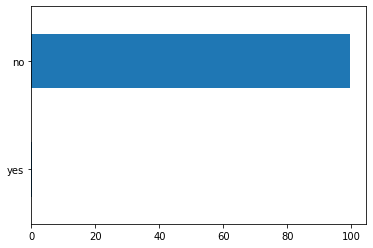

In [39]:
#6 month report
foreclosures = mortgagerelief["6-month report \r\nHas this property been foreclosed?"].str.lower().str.strip()
foreclosures = foreclosures.fillna("no") #na = didn't foreclose
foreclosures = foreclosures.replace({"na": "no", "deed-in-lieu": "yes", "n/a": "no"})
foreclosures = foreclosures.value_counts().sort_values() #note: 1123 no, 3 yes
foreclosures = foreclosures / sum(foreclosures) * 100
foreclosures.plot.barh()


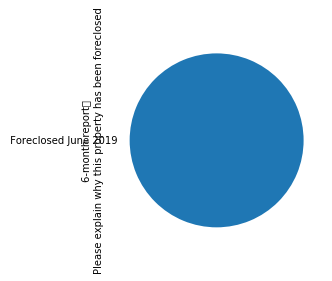

In [50]:
#reason
foreclosures = mortgagerelief["6-month report \r\nHas this property been foreclosed?"].str.lower().str.strip()
foreclosures = foreclosures.fillna("no") #na = didn't foreclose
foreclosures = foreclosures.replace({"na": "no", " deed-in-lieu ": "yes", 
                                    "n/a": "no"})

foreclosureIndices = foreclosures[foreclosures=="yes"].index #get the indices of foreclosures
foreclosureReasons = mortgagerelief["6-month report\r\nPlease explain why this property has been foreclosed"]
foreclosureReasons = foreclosureReasons.loc[[index for index in foreclosureIndices]] #isolate just the rows where foreclosed was "yes"
foreclosureReasons = foreclosureReasons.value_counts()
foreclosureReasons.plot.pie()


no     1125
yes       1
Name: 12-month report \r\nHas this property been foreclosed?, dtype: int64


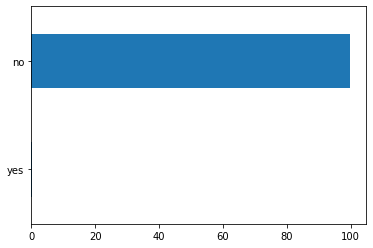

In [45]:
#12 month report 
foreclosures = mortgagerelief["12-month report \r\nHas this property been foreclosed?"].str.lower().str.strip()
foreclosures = foreclosures.fillna("no") #na = didn't foreclose
foreclosures = foreclosures.replace({"na": "no", "n/a": "no",
    "no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no": "no"}) #idk what happened there lol

print(foreclosures.value_counts())
foreclosures = foreclosures.value_counts().sort_values() #note: 1125 no, 1 yes
foreclosures = foreclosures / sum(foreclosures) * 100
foreclosures.plot.barh()


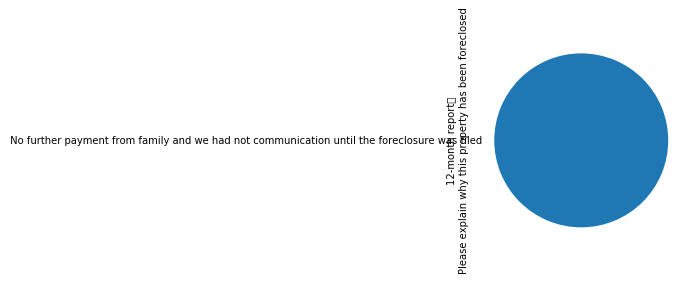

In [49]:
#reason
foreclosures = mortgagerelief["12-month report \r\nHas this property been foreclosed?"].str.lower().str.strip()
foreclosures = foreclosures.fillna("no") #na = didn't foreclose
foreclosures = foreclosures.replace({"na": "no", "n/a": "no",
    "no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no \r\n no": "no"})

foreclosureIndices = foreclosures[foreclosures=="yes"].index #get the indices of foreclosures
foreclosureReasons = mortgagerelief["12-month report\r\nPlease explain why this property has been foreclosed"]
foreclosureReasons = foreclosureReasons.loc[[index for index in foreclosureIndices]] #isolate just the rows where foreclosed was "yes"
foreclosureReasons = foreclosureReasons.value_counts()
foreclosureReasons.plot.pie()

In [21]:
mortgagerelief.keys()

Index(['Affiliate', 'ID', 'Loan No', 'Street Address\r\n(ex: 1234 Five Lane)',
       'City', 'State Abbreviation', 'Zip', ' Sales Price ',
       'Closing Date\r\n(mm/yyyy)', 'Term (Months)', ' Opening Balance ',
       ' Principal and Interest Payment ',
       ' Total Monthly Payment (including escrow) ', 'Maturity Date\r\n(yyyy)',
       ' Outstanding Balance ',
       ' $ Amount supported by this award for this loan (for example, $600 if supporting 3 months of escrow payments at $200) ',
       'Days Delinquent (reported by the 5th of the month for the previous month)',
       'Reasons delinquent', 'Describe other reasons delinquent',
       'Forbearance issued?', '# of months forbearance issued', ' Arrearage ',
       'Please describe how this loan is serviced',
       'Has this property been foreclosed?',
       'Please explain why this property has been foreclosed',
       'FICO (when available)',
       'Date FICO accessed (when available-ex. Jun 20 for June 2020)',
       'Fi